# 0. Magic Commands


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [3]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# 2. ข้อมูล

ใช้ชุดข้อมูล Dataset [MNIST](http://yann.lecun.com/exdb/mnist/) ตัวเลขอารบิคเขียนด้วยลายมือ

In [4]:
path = untar_data(URLs.MNIST)

# 3. เตรียมข้อมูล



In [5]:
batchsize = 64
np.random.seed(0)
transform = get_transforms(do_flip=False)

databunch = ImageDataBunch.from_folder(path, train='training', 
                                       valid_pct=0.2, size=28, 
                                       ds_tfms=transform, bs=batchsize, 
                                       num_workers=8).normalize()

# 4. สร้างโมเดล

ด้วย resnet18

In [6]:
# learner = cnn_learner(databunch, models.resnet18, metrics=accuracy)

# 5. เริ่มต้นเทรนโมเดล

ปกติ Learning Rate จะมีค่า Default ประมาณ 3e-3 หรือ 0.003 เราจะลองเทรนด้วย Learning Rate สูงมาก และต่ำมาก ดูว่าจะเป็นอย่างไร

## ลองเทรนด้วย Learning Rate สูง ๆ เช่น 0.9

epoch,train_loss,valid_loss,accuracy,time
0,83.549622,146.220108,0.368929,03:33


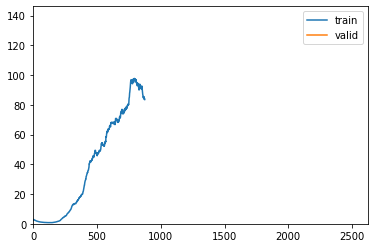

In [ ]:
learner = cnn_learner(databunch, models.resnet18, 
                      metrics=accuracy, callback_fns=ShowGraph)
learner.fit_one_cycle(3, max_lr=0.9)

Weight ของ Model ถูกลบด้วยค่าที่ใหญ่มากเกินไป ซ้ำ ๆ เหมือนถูกระเบิดออก ทำให้ Loss กระเด้งไปมา ไม่ลงสู่จุดต่ำ บางทีมากเกินกว่าที่ตัวเลข จะรับได้ เลยกลายเป็นค่า NaN หรือ Not a Number

## ลองเทรนด้วย Learning Rate ต่ำ ๆ เช่น 0.000001

In [ ]:
learner = cnn_learner(databunch, models.resnet18, 
                      metrics=accuracy, callback_fns=ShowGraph)
learner.fit_one_cycle(10, max_lr=0.000001)

epoch,train_loss,valid_loss,accuracy,time


Weight ของ Model ถูกลบด้วยค่าที่เล็กเกินไป ทำให้ Loss ไม่ขยับไปไหน 

## ลองเทรนด้วย Epoch น้อยเกินไป

In [ ]:
learner = cnn_learner(databunch, models.resnet18, 
                      metrics=accuracy, callback_fns=ShowGraph)
learner.fit_one_cycle(1, max_lr=0.003)

## ลองเทรนด้วย Epoch เยอะเกินไป เทรนนาน ๆ 

In [ ]:
learner = cnn_learner(databunch, models.resnet18, 
                      metrics=accuracy, callback_fns=ShowGraph)
learner.fit_one_cycle(50, max_lr=0.003)

# Credit 

* [FastAI: Practical Deep Learning for Coders, v3 - Lesson 2](https://course.fast.ai/videos/?lesson=2)